<a href="https://colab.research.google.com/github/sahasi24/market-segmentation/blob/main/market_segmentation_(_replication_in_python).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("mcdonalds.csv")
df.shape

(1453, 15)

In [3]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
df.VisitFrequency.value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

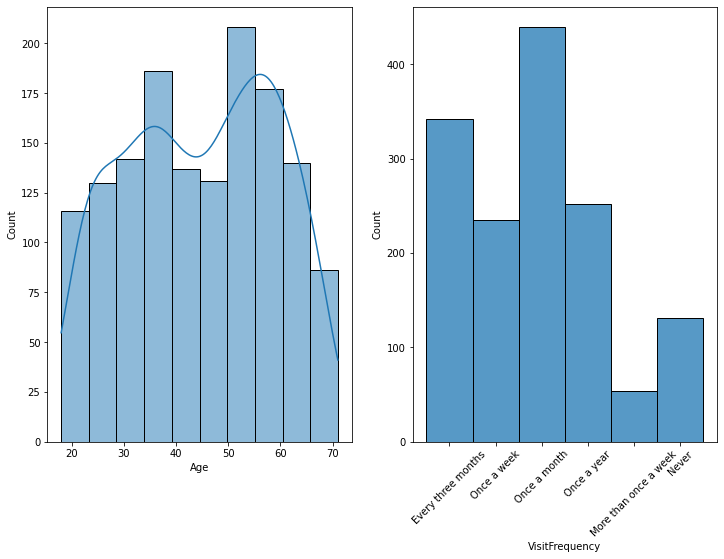

In [5]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.histplot(x='Age',data=df,kde=True,bins=10)
plt.subplot(1,2,2)
sns.histplot(x='VisitFrequency',data=df)
plt.xticks(rotation=45)
plt.show()

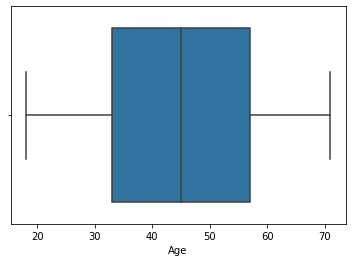

In [6]:
sns.boxplot(x='Age',data=df)
plt.show()

In [7]:
df.Like = df.Like.replace(['I hate it!-5','I love it!+5'],['-5','+5']).astype('int64') + 5

In [8]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,2,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,7,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,6,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,9,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,7,49,Once a month,Male


In [9]:
df.replace(['Yes','No'],[1,0],inplace=True)

In [10]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,2,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,7,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,6,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,9,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,7,49,Once a month,Male


In [11]:
df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,5.777013,44.604955
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,3.116842,14.221178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,33.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.000000,45.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,8.000000,57.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,71.000000


In [12]:
df.groupby('VisitFrequency').agg('mean')

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age
VisitFrequency,,,,,,,,,,,,,
Every three months,0.505848,0.950292,0.099415,0.874269,0.532164,0.888889,0.567251,0.616959,0.362573,0.184211,0.236842,5.576023,46.666667
More than once a week,0.944444,0.981481,0.129630,0.777778,0.407407,0.944444,0.648148,0.944444,0.370370,0.407407,0.055556,8.851852,37.944444
Never,0.045802,0.580153,0.106870,0.946565,0.770992,0.847328,0.526718,0.160305,0.419847,0.053435,0.740458,1.083969,51.167939
Once a month,0.742597,0.965831,0.082005,0.842825,0.437358,0.922551,0.610478,0.820046,0.337130,0.230068,0.102506,7.220957,42.305239
Once a week,0.800000,0.974468,0.093617,0.834043,0.476596,0.910638,0.685106,0.842553,0.336170,0.276596,0.089362,7.978723,38.753191
Once a year,0.234127,0.841270,0.091270,0.908730,0.619048,0.884921,0.567460,0.376984,0.373016,0.123016,0.420635,3.261905,49.285714


In [13]:
from sklearn.decomposition import PCA
pca = PCA()
transformed_data = pca.fit_transform(df.iloc[:,:-4])

In [14]:
pca.explained_variance_ratio_.cumsum()

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [15]:
cols = ['PC'+str(i) for i in range(1,12)]
components_df = pd.DataFrame(pca.components_.T,columns = cols,index=df.columns[:-4])

In [16]:
components_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069
healthy,-0.213711,0.076593,0.192051,0.763488,0.287846,-0.178226,-0.349616,0.176303,-0.185572,-0.038117,0.157608


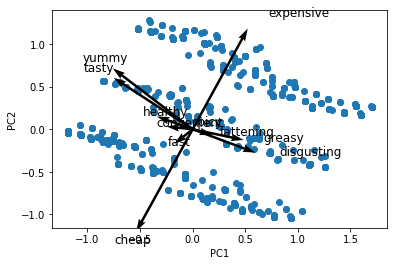

In [17]:
plt.scatter(transformed_data[:,0],transformed_data[:,1])
for i in range(len(components_df)):
    b = (components_df.iloc[i,0],components_df.iloc[i,1])
    t_loc = (components_df.iloc[i,0]*2.2,components_df.iloc[i,1]*2.2)
    plt.quiver(0,0,*b,scale=2)
    plt.text(*t_loc, components_df.index[i], fontsize=12)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [18]:
np.sqrt(np.square(components_df.PC1)+np.square(components_df.PC2))

yummy         0.599840
convenient    0.156196
spicy         0.019854
fattening     0.121129
greasy        0.311064
fast          0.139050
cheap         0.697543
tasty         0.562823
expensive     0.685429
healthy       0.227022
disgusting    0.399930
dtype: float64

<AxesSubplot:xlabel='Age', ylabel='count'>

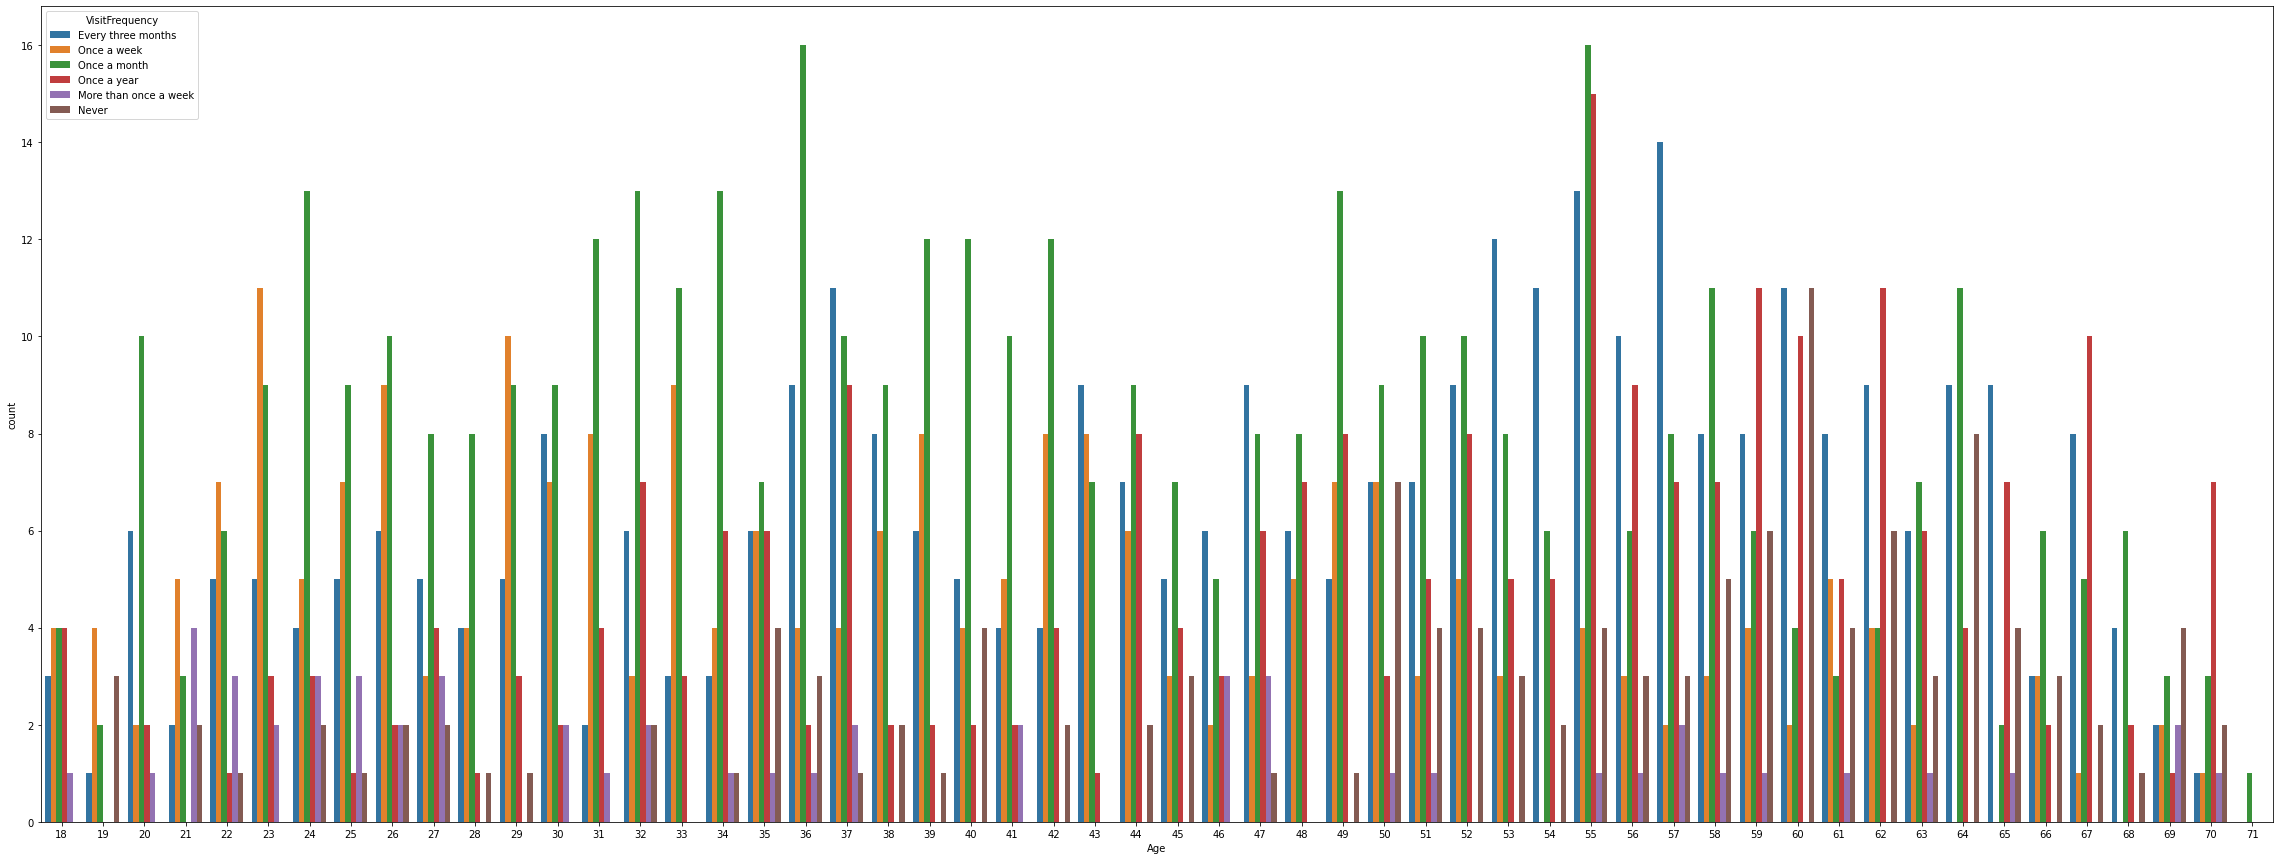

In [19]:
## age vs frequency
plt.figure(figsize=(40,15))
sns.countplot(x="Age", data=df, hue="VisitFrequency")

Psychogrpahic Analysis

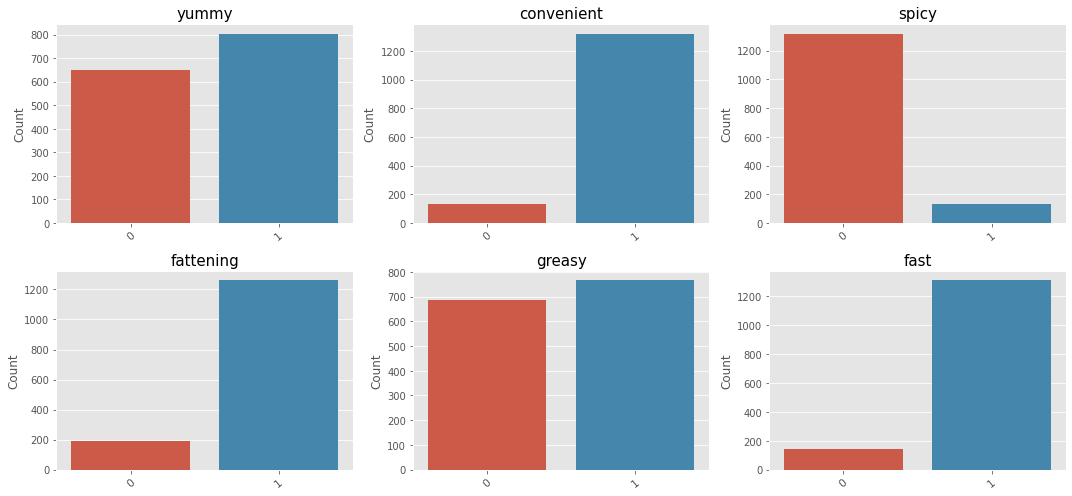

In [20]:
plt.figure(figsize = (15, 7))
plt.style.use('ggplot')

def plotgraph(title,i):
  plt.subplot(2,3,i)
  ax = sns.countplot(x=title, data=df)
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
  ax.set_title(title,fontsize = 15)
  ax.set_xlabel('',fontsize = 12)
  ax.set_ylabel('Count', fontsize = 12)
  plt.tight_layout()

titles = ["yummy","convenient","spicy","fattening","greasy","fast"]#,"cheap","tasty","expensive","healthy","disgusting","like"]
i=1
for each in titles:
  plotgraph(each,i)
  i+=1

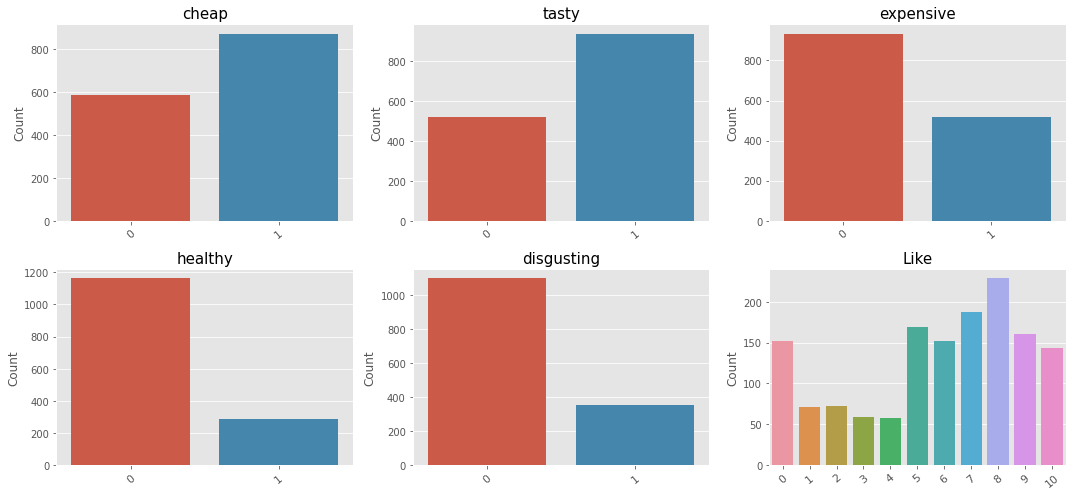

In [21]:

plt.figure(figsize = (15, 7))
plt.style.use('ggplot')
titles = ["cheap","tasty","expensive","healthy","disgusting","Like"]
i=1
for each in titles:
  plotgraph(each,i)
  i+=1

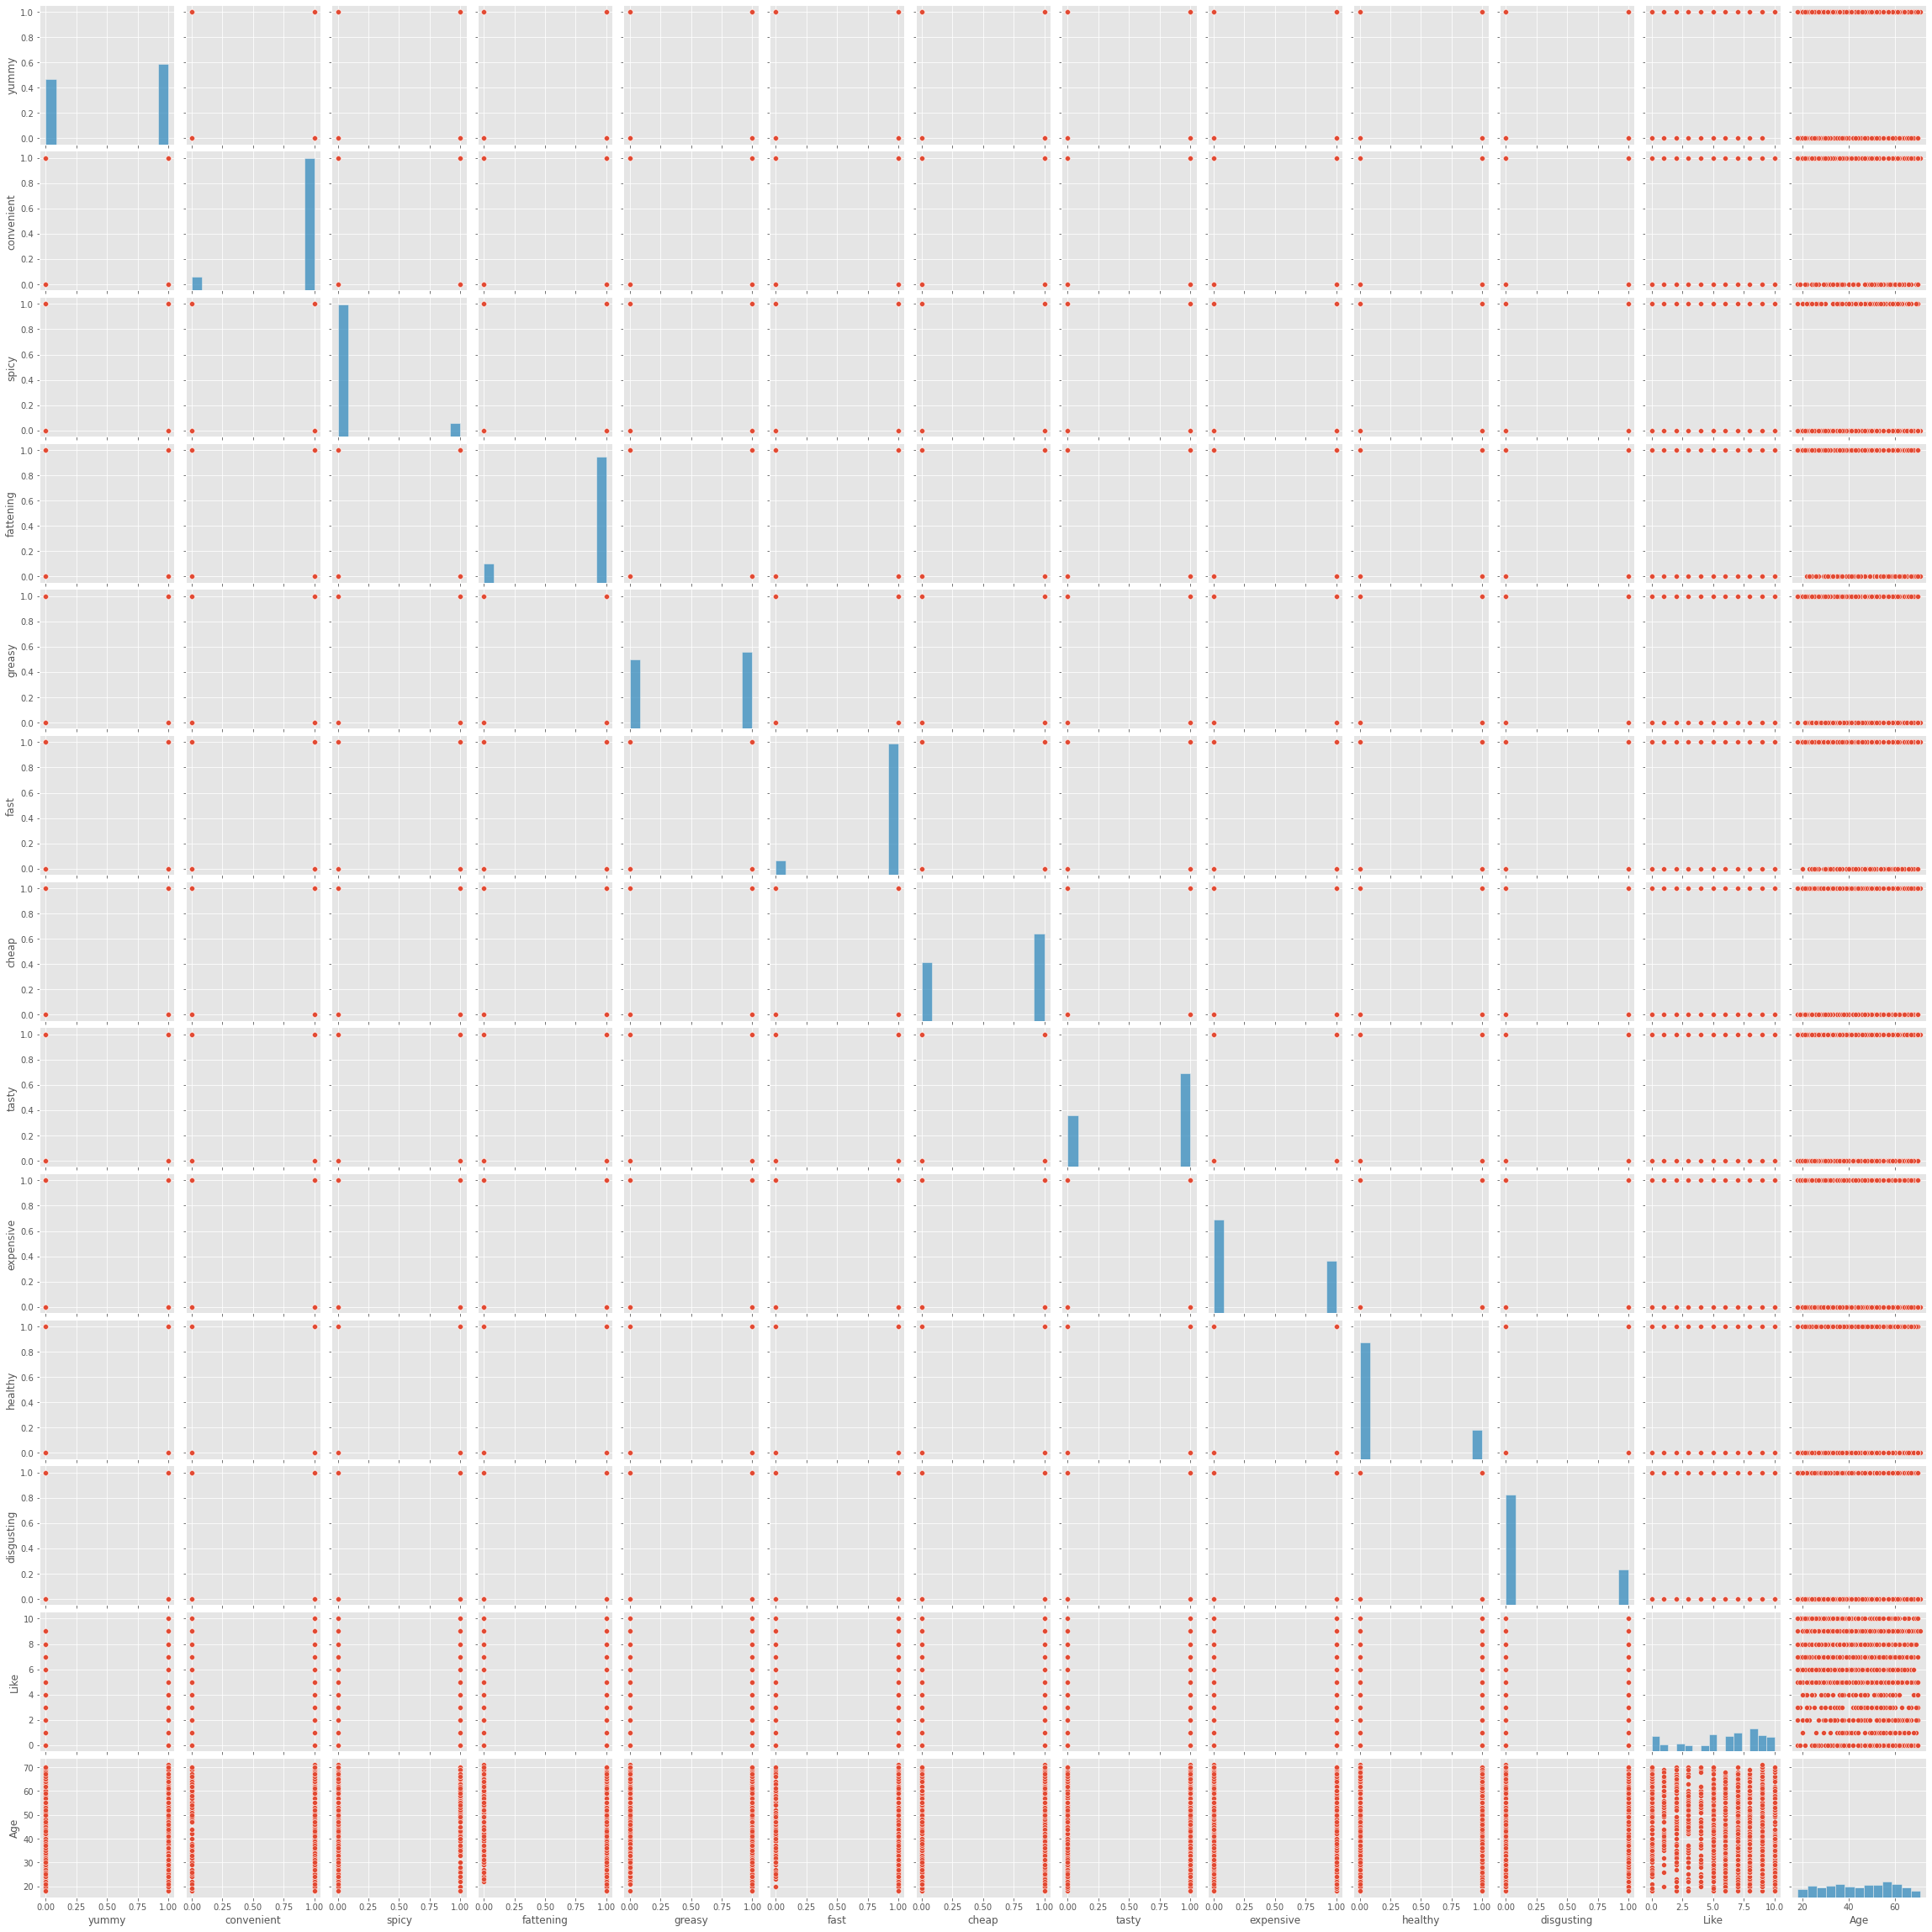

In [22]:
sns.pairplot(df)


K means Clustering

In [23]:
from sklearn.cluster import KMeans

Using only 2 features : Age and Like

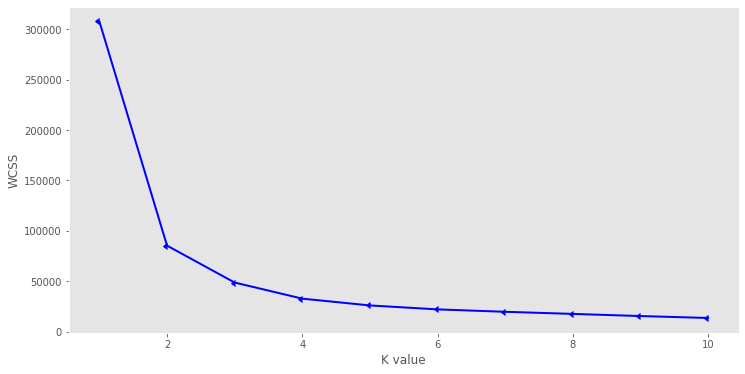

In [24]:
X1= df.loc[:,["Age","Like"]].values
wcss=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="blue",marker=8)
plt.xlabel('K value')
plt.ylabel("WCSS")
plt.show()

optimum number of clusters=4

In [25]:
kmeans = KMeans(n_clusters=4)
label=kmeans.fit_predict(X1)
print(label)

[2 1 2 ... 1 3 0]


In [26]:
clusters=kmeans.cluster_centers_
print(clusters)

[[25.13109756  7.14329268]
 [50.89182058  5.16886544]
 [62.35309973  4.91644205]
 [37.72533333  6.048     ]]


Text(0, 0.5, 'Like')

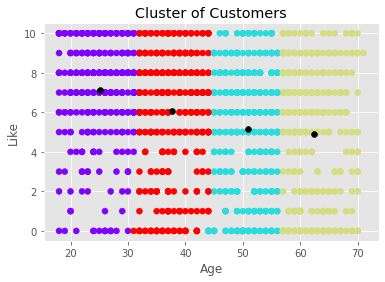

In [27]:
plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(clusters[:,0],clusters[:,1],color="black")
plt.title("Cluster of Customers")
plt.xlabel("Age")
plt.ylabel("Like")

Using 2 features : yummy and cheap

C:\Users\SHUBHNAG SHARMA\AppData\Local\Temp\ipykernel_18472\609952026.py:5: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(X2)
C:\Users\SHUBHNAG SHARMA\AppData\Local\Temp\ipykernel_18472\609952026.py:5: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(X2)
C:\Users\SHUBHNAG SHARMA\AppData\Local\Temp\ipykernel_18472\609952026.py:5: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(X2)
C:\Users\SHUBHNAG SHARMA\AppData\Local\Temp\ipykernel_18472\609952026.py:5: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(X2)
C:\Users\SHUBHNAG SHARMA\AppData\Local\Temp\ipykernel_18472\609952026.py:5: ConvergenceWarning: Number of distinct clusters 

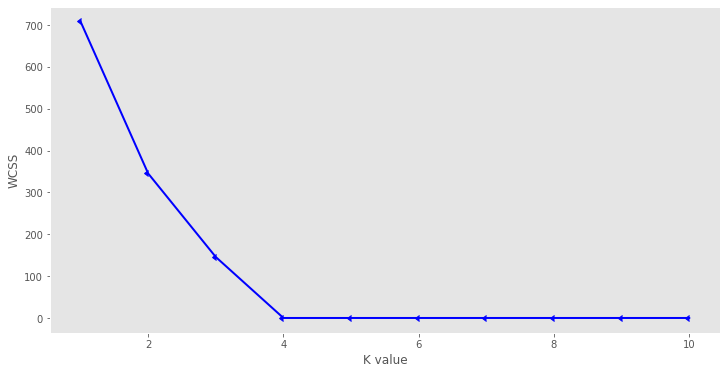

In [28]:
X2= df.loc[:,["yummy","cheap"]].values
wcss=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X2)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="blue",marker=8)
plt.xlabel('K value')
plt.ylabel("WCSS")
plt.show()

choosing clusters as 4

In [29]:
kmeans = KMeans(n_clusters=4)
label=kmeans.fit_predict(X2)
print(label)

[1 0 2 ... 3 0 2]


In [30]:
clusters=kmeans.cluster_centers_
print(clusters)

[[ 1.00000000e+00  1.00000000e+00]
 [-2.22044605e-16  1.00000000e+00]
 [-3.33066907e-16  4.44089210e-16]
 [ 1.00000000e+00  3.33066907e-16]]


Text(0, 0.5, 'cheap')

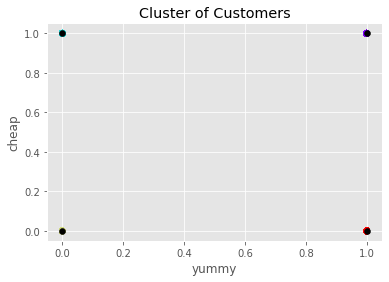

In [31]:
plt.scatter(X2[:,0],X2[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(clusters[:,0],clusters[:,1],color="black")
plt.title("Cluster of Customers")
plt.xlabel("yummy")
plt.ylabel("cheap")

using 2 features : yummy and expensive

C:\Users\SHUBHNAG SHARMA\AppData\Local\Temp\ipykernel_18472\1214792703.py:5: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(X3)
C:\Users\SHUBHNAG SHARMA\AppData\Local\Temp\ipykernel_18472\1214792703.py:5: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(X3)
C:\Users\SHUBHNAG SHARMA\AppData\Local\Temp\ipykernel_18472\1214792703.py:5: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(X3)
C:\Users\SHUBHNAG SHARMA\AppData\Local\Temp\ipykernel_18472\1214792703.py:5: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(X3)
C:\Users\SHUBHNAG SHARMA\AppData\Local\Temp\ipykernel_18472\1214792703.py:5: ConvergenceWarning: Number of distinct clus

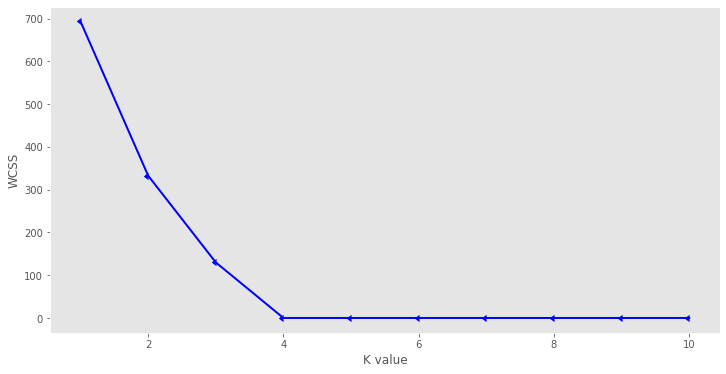

In [32]:
X3= df.loc[:,["yummy","expensive"]].values
wcss=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X3)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="blue",marker=8)
plt.xlabel('K value')
plt.ylabel("WCSS")
plt.show()

taking 4 optimal clusters

In [33]:
kmeans = KMeans(n_clusters=4)
label=kmeans.fit_predict(X3)
print(label)

[3 0 3 ... 0 1 3]


In [34]:
clusters=kmeans.cluster_centers_
print(clusters)

[[ 1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  3.33066907e-16]
 [ 0.00000000e+00  2.22044605e-16]
 [-3.33066907e-16  1.00000000e+00]]


Text(0, 0.5, 'expensive')

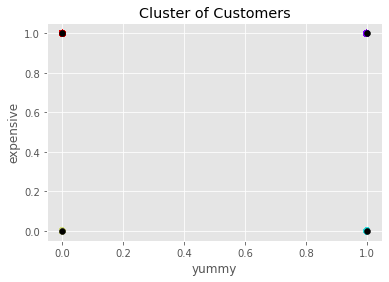

In [35]:
plt.scatter(X3[:,0],X3[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(clusters[:,0],clusters[:,1],color="black")
plt.title("Cluster of Customers")
plt.xlabel("yummy")
plt.ylabel("expensive")

using 2 features : disgusting and cheap

C:\Users\SHUBHNAG SHARMA\AppData\Local\Temp\ipykernel_18472\539322360.py:5: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(X4)
C:\Users\SHUBHNAG SHARMA\AppData\Local\Temp\ipykernel_18472\539322360.py:5: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(X4)
C:\Users\SHUBHNAG SHARMA\AppData\Local\Temp\ipykernel_18472\539322360.py:5: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(X4)
C:\Users\SHUBHNAG SHARMA\AppData\Local\Temp\ipykernel_18472\539322360.py:5: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(X4)
C:\Users\SHUBHNAG SHARMA\AppData\Local\Temp\ipykernel_18472\539322360.py:5: ConvergenceWarning: Number of distinct clusters 

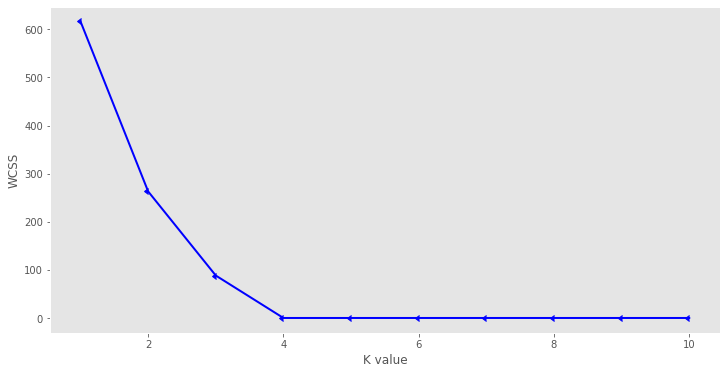

In [36]:
X4= df.loc[:,["disgusting","cheap"]].values
wcss=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X4)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="blue",marker=8)
plt.xlabel('K value')
plt.ylabel("WCSS")
plt.show()

In [37]:
kmeans = KMeans(n_clusters=4)
label=kmeans.fit_predict(X4)
print(label)

[0 0 1 ... 1 0 2]


In [38]:
clusters=kmeans.cluster_centers_
print(clusters)

[[-3.05311332e-16  1.00000000e+00]
 [-2.22044605e-16  0.00000000e+00]
 [ 1.00000000e+00  1.11022302e-16]
 [ 1.00000000e+00  1.00000000e+00]]


Text(0, 0.5, 'cheap')

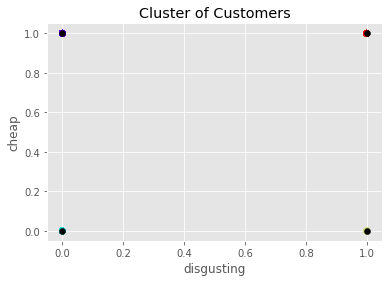

In [39]:
plt.scatter(X4[:,0],X4[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(clusters[:,0],clusters[:,1],color="black")
plt.title("Cluster of Customers")
plt.xlabel("disgusting")
plt.ylabel("cheap")

using 2 features : disgusting and expensive

C:\Users\SHUBHNAG SHARMA\AppData\Local\Temp\ipykernel_18472\1234187324.py:5: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(X5)
C:\Users\SHUBHNAG SHARMA\AppData\Local\Temp\ipykernel_18472\1234187324.py:5: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(X5)
C:\Users\SHUBHNAG SHARMA\AppData\Local\Temp\ipykernel_18472\1234187324.py:5: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(X5)
C:\Users\SHUBHNAG SHARMA\AppData\Local\Temp\ipykernel_18472\1234187324.py:5: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(X5)
C:\Users\SHUBHNAG SHARMA\AppData\Local\Temp\ipykernel_18472\1234187324.py:5: ConvergenceWarning: Number of distinct clus

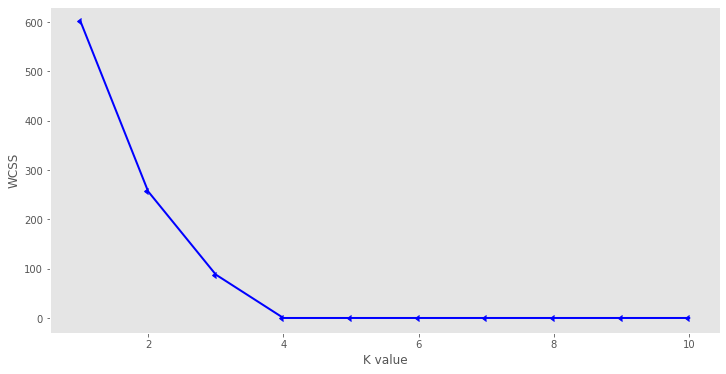

In [40]:
X5= df.loc[:,["disgusting","expensive"]].values
wcss=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X5)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="blue",marker=8)
plt.xlabel('K value')
plt.ylabel("WCSS")
plt.show()

In [41]:
kmeans = KMeans(n_clusters=4)
label=kmeans.fit_predict(X5)
print(label)

[0 0 0 ... 0 1 2]


In [42]:
clusters=kmeans.cluster_centers_
print(clusters)

[[-1.94289029e-16  1.00000000e+00]
 [-1.94289029e-16  3.88578059e-16]
 [ 1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00]]


Text(0, 0.5, 'expensive')

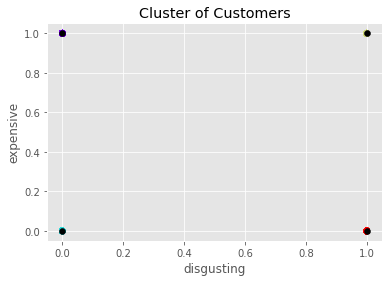

In [43]:
plt.scatter(X5[:,0],X5[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(clusters[:,0],clusters[:,1],color="black")
plt.title("Cluster of Customers")
plt.xlabel("disgusting")
plt.ylabel("expensive")

Using 3 features : Age,Like and expensive

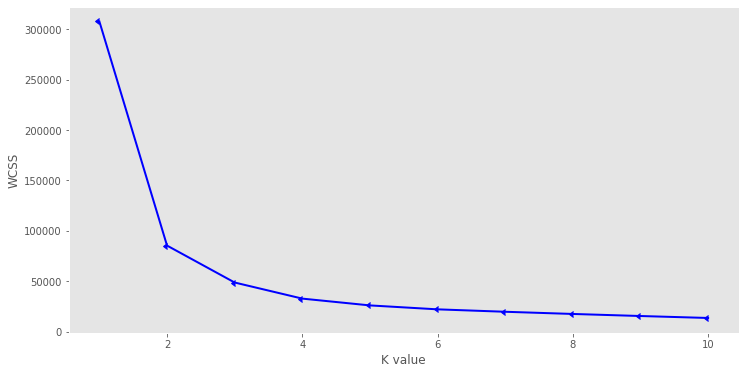

In [44]:
X2= df.loc[:,["Age","Like","expensive"]].values
wcss=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="blue",marker=8)
plt.xlabel('K value')
plt.ylabel("WCSS")
plt.show()

we choose 4 clusters as optimum

In [45]:
kmeans = KMeans(n_clusters=4)
label=kmeans.fit_predict(X2)
print(label)

[2 0 2 ... 0 1 3]


In [46]:
clusters=kmeans.cluster_centers_
print(clusters)

[[50.87368421  5.16052632  0.39210526]
 [37.70855615  6.05882353  0.4197861 ]
 [62.35309973  4.91644205  0.26684636]
 [25.13109756  7.14329268  0.35060976]]


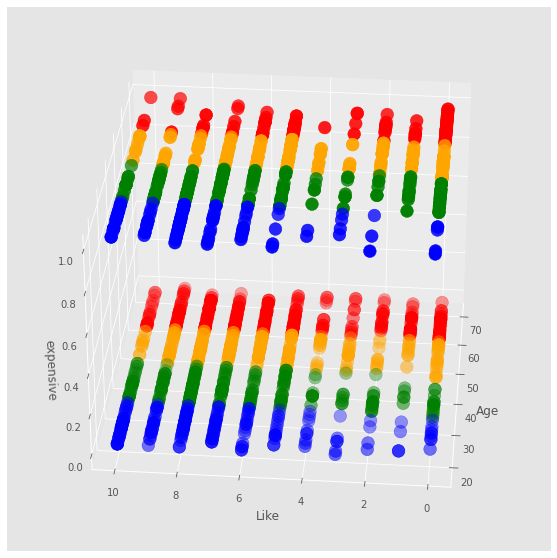

In [47]:
cluster=kmeans.fit_predict(X2)
df['label'] = cluster
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df["Age"][df.label==0],df["Like"][df.label==0],df["expensive"][df.label==0],c ='blue',s=160)
ax.scatter(df["Age"][df.label==1],df["Like"][df.label==1],df["expensive"][df.label==1],c ='red',s=160)
ax.scatter(df["Age"][df.label==2],df["Like"][df.label==2],df["expensive"][df.label==2],c ='green',s=160)
ax.scatter(df["Age"][df.label==3],df["Like"][df.label==3],df["expensive"][df.label==3],c ='orange',s=160)
ax.view_init(30,185)

plt.xlabel("Age")
plt.ylabel("Like")
ax.set_zlabel("expensive")
plt.show()

Using 3 features : Age,Like and healthy

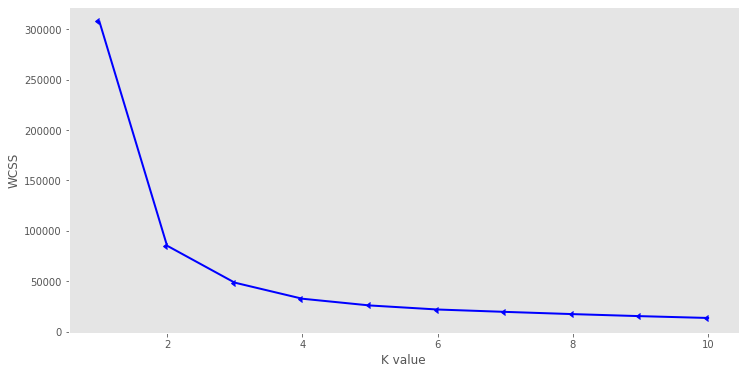

In [48]:
X3= df.loc[:,["Age","Like","healthy"]].values
wcss=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="blue",marker=8)
plt.xlabel('K value')
plt.ylabel("WCSS")
plt.show()

we choose 4 clusters as optimum

In [49]:
kmeans = KMeans(n_clusters=4)
label=kmeans.fit_predict(X3)
print(label)

[3 1 3 ... 1 2 0]


In [50]:
clusters=kmeans.cluster_centers_
print(clusters)

[[25.13109756  7.14329268  0.16463415]
 [51.56756757  5.33169533  0.18918919]
 [37.85639687  5.92689295  0.22976501]
 [62.92835821  4.80895522  0.20895522]]


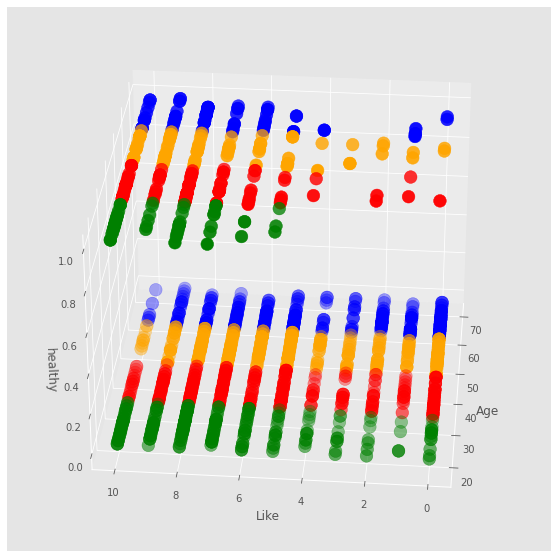

In [51]:
cluster=kmeans.fit_predict(X3)
df['label'] = cluster
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df["Age"][df.label==0],df["Like"][df.label==0],df["healthy"][df.label==0],c ='blue',s=160)
ax.scatter(df["Age"][df.label==1],df["Like"][df.label==1],df["healthy"][df.label==1],c ='red',s=160)
ax.scatter(df["Age"][df.label==2],df["Like"][df.label==2],df["healthy"][df.label==2],c ='green',s=160)
ax.scatter(df["Age"][df.label==3],df["Like"][df.label==3],df["healthy"][df.label==3],c ='orange',s=160)
ax.view_init(30,185)

plt.xlabel("Age")
plt.ylabel("Like")
ax.set_zlabel("healthy")
plt.show()